<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/(Andhi_Hamzah)_McDonald's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deskripsi

a) Berapa banyak kalori yang terkandung dalam makanan bernilai rata-rata McDonald's?

b) Berapa banyak minuman, seperti soda atau kopi, berkontribusi pada asupan kalori keseluruhan?

c) Apakah ayam bakar yang dipesan dan bukannya renyah meningkatkan nilai gizi sandwich?

d) Bagaimana dengan memesan putih telur daripada telur utuh?

e) Berapa jumlah makanan paling sedikit yang dapat Anda pesan dari menu untuk memenuhi kebutuhan gizi suatu hari?

# Data Import

In [ ]:
#memasukkan data 
#jika dari colab langsung hapus path sampai colab notebook 
import pandas as pd
import numpy as np
path = ("/content/drive/My Drive/Colab Notebooks/menu.csv")
df = pd.read_csv(path)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

# Data Preparation

In [ ]:
df.isnull().values.any()

False

In [ ]:
df= pd.read_csv(path,nrows=10)
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,406.000000,196.000000,21.900000,33.80000,9.300000,47.000000,0.100000,153.500000,50.900000,1043.000000,43.500000,34.000000,11.300000,3.400000,14.100000,2.900000,19.500000,9.300000,3.400000,22.500000,13.800000
std,81.267733,60.037026,6.740425,10.49656,3.465705,16.911535,0.316228,122.837969,41.164845,279.962299,11.597414,5.333333,1.766981,0.843274,4.306326,0.737865,3.100179,4.547282,4.005552,5.892557,4.211096
min,250.000000,70.000000,8.000000,12.00000,3.000000,15.000000,0.000000,25.000000,8.000000,750.000000,31.000000,29.000000,10.000000,2.000000,7.000000,2.000000,14.000000,2.000000,0.000000,15.000000,8.000000
25%,377.500000,185.000000,20.750000,32.75000,8.000000,42.000000,0.000000,37.500000,12.000000,800.000000,33.750000,30.000000,10.000000,3.000000,12.000000,2.250000,18.250000,6.000000,0.000000,16.250000,10.000000
50%,420.000000,210.000000,23.000000,35.50000,9.500000,49.000000,0.000000,150.000000,49.500000,920.000000,38.500000,31.000000,10.000000,4.000000,17.000000,3.000000,19.500000,9.000000,1.000000,25.000000,15.000000
75%,457.500000,227.500000,25.750000,39.50000,11.750000,58.250000,0.000000,257.500000,86.000000,1300.000000,54.000000,37.500000,12.750000,4.000000,17.000000,3.000000,20.750000,13.750000,8.000000,25.000000,15.000000
max,520.000000,270.000000,30.000000,47.00000,14.000000,68.000000,1.000000,300.000000,100.000000,1420.000000,59.000000,43.000000,14.000000,4.000000,18.000000,4.000000,26.000000,15.000000,8.000000,30.000000,20.000000


In [ ]:
kolum = ["Category","Item","Calories","Protein","Calcium (% Daily Value)","Iron (% Daily Value)"]
df= pd.read_csv(path, usecols=kolum)

In [ ]:
df.describe()

,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000
mean,368.269231,13.338462,20.973077,7.734615
std,240.269886,11.426146,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000
25%,210.000000,4.000000,6.000000,0.000000
50%,340.000000,12.000000,20.000000,4.000000
75%,500.000000,19.000000,30.000000,15.000000
max,1880.000000,87.000000,70.000000,40.000000


In [ ]:
df.dtypes

Category                   object
Item                       object
Calories                    int64
Protein                     int64
Calcium (% Daily Value)     int64
Iron (% Daily Value)        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Category                 260 non-null    object
 1   Item                     260 non-null    object
 2   Calories                 260 non-null    int64 
 3   Protein                  260 non-null    int64 
 4   Calcium (% Daily Value)  260 non-null    int64 
 5   Iron (% Daily Value)     260 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ KB


In [ ]:
#@title Binning
bins = np.linspace(min(df["Calories"]), max(df["Calories"]), 4)
bins

array([   0.        ,  626.66666667, 1253.33333333, 1880.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['Calories-binned'] = pd.cut(df['Calories'], bins, labels=group_names, include_lowest=True )
df[['Calories','Calories-binned']].head(261)

,Calories,Calories-binned
0,300,Low
1,250,Low
2,370,Low
3,450,Low
4,400,Low
...,...,...
255,510,Low
256,690,Medium
257,340,Low
258,810,Medium


# Data Visualisation

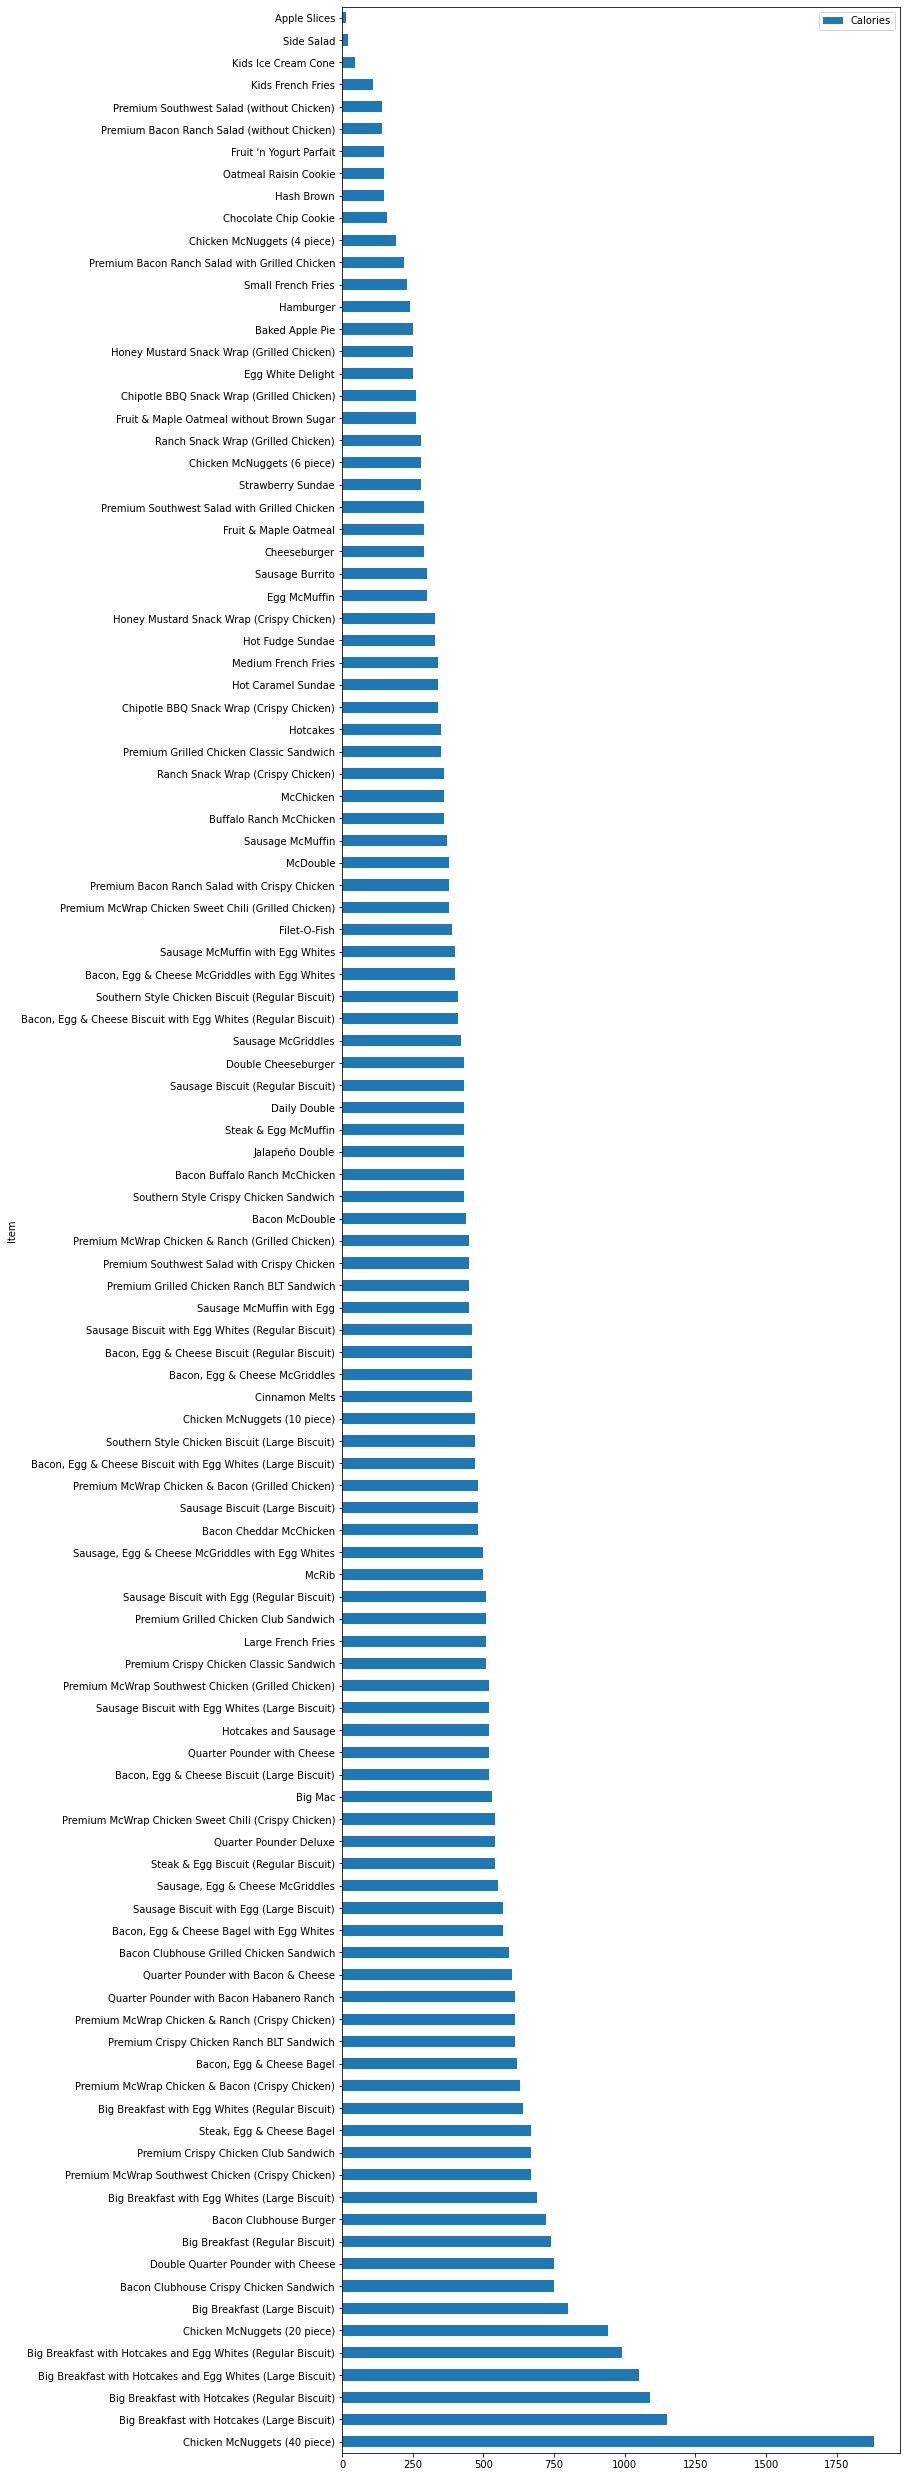

In [ ]:
import matplotlib.pyplot as plt
meals = df.head(110) # All meals (without drinks) are in first 110 rows of the dataset
meals_cal = pd.DataFrame({'Item': meals.Item, 'Calories': meals.Calories}) # Select only Items and Calories columns
meals_sort = meals_cal.sort_values('Calories', ascending=False) # Sort by calories
meals_sort.plot.barh(x='Item', y='Calories', figsize= (10,45)) # Plot horizontal bar
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

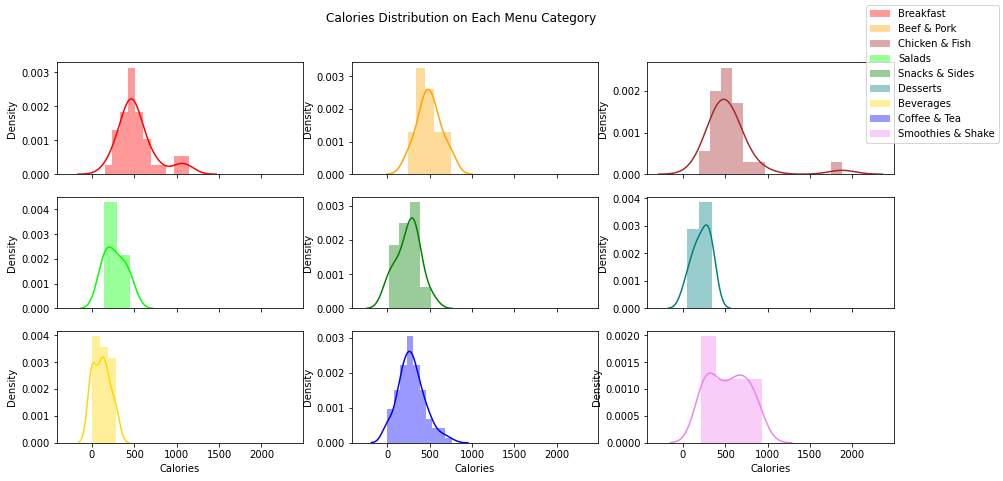

In [ ]:

brkf = df.loc[df.Category == 'Breakfast']
bnp = df.loc[df.Category == 'Beef & Pork']
cnf = df.loc[df.Category == 'Chicken & Fish']
sld = df.loc[df.Category == 'Salads']
snass = df.loc[df.Category == 'Snacks & Sides']
dess = df.loc[df.Category == 'Desserts'] 
bev = df.loc[df.Category == 'Beverages']
cnt = df.loc[df.Category == 'Coffee & Tea']
ss = df.loc[df.Category == 'Smoothies & Shakes']

import seaborn as sns
# Plot calorie distribution for each category
fig, axes = plt.subplots(3, 3, figsize=(15, 7), sharex=True)
sns.color_palette("tab10")
sns.distplot( brkf["Calories"] , color='red', ax=axes[0, 0], label = "Breakfast")
sns.distplot( bnp["Calories"] , color='orange',ax=axes[0, 1], label = "Beef & Pork")
sns.distplot( cnf["Calories"] , color='brown',ax=axes[0, 2], label = "Chicken & Fish")
sns.distplot( sld["Calories"] , color='lime',ax=axes[1, 0], label = "Salads")
sns.distplot( snass["Calories"] , color='green',ax=axes[1, 1], label = "Snacks & Sides")
sns.distplot( dess["Calories"] ,  color='teal',ax=axes[1, 2], label = "Desserts")
sns.distplot( bev["Calories"] ,  color='gold',ax=axes[2, 0], label = "Beverages")
sns.distplot( cnt["Calories"] ,  color='blue',ax=axes[2, 1], label = "Coffee & Tea")
sns.distplot( ss["Calories"] ,  color='violet',ax=axes[2, 2], label = "Smoothies & Shake")
fig.suptitle("Calories Distribution on Each Menu Category")
fig.legend()
plt.show()

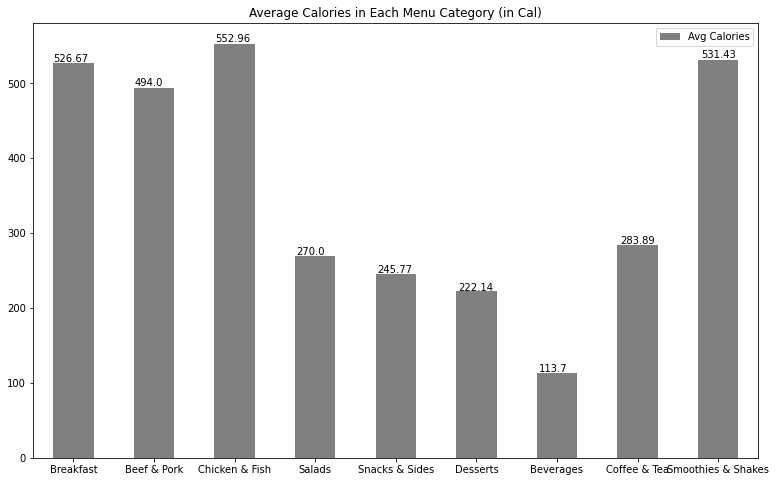

In [ ]:
# Average calories on each categories
avg_cat = [round(brkf['Calories'].mean(axis=0), 2), round(bnp['Calories'].mean(axis=0), 2), round(cnf['Calories'].mean(axis=0), 2),
          round(sld['Calories'].mean(axis=0), 2), round(snass['Calories'].mean(axis=0), 2), round(dess['Calories'].mean(axis=0), 2),
          round(bev['Calories'].mean(axis=0), 2), round(cnt['Calories'].mean(axis=0), 2), round(ss['Calories'].mean(axis=0), 2)]
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes']
avg_calat= pd.DataFrame({'Avg Calories': avg_cat}, index=index)
ax = avg_calat.plot.bar(rot=0, color='gray', figsize=(13,8), title='Average Calories in Each Menu Category (in Cal)', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
print("Average calories of all McD's meals (include drinks) is ", round(df['Calories'].mean(axis=0), 2), "Cal.") #average calories of all meals (include drinks)
print("Average calories of all McD's meals (drinks excluded) is ", round(meals.Calories.mean(axis=0), 2), "Cal.") #average calories of meals (no drinks)

Average calories of all McD's meals (include drinks) is  368.27 Cal.
Average calories of all McD's meals (drinks excluded) is  462.09 Cal.


In [ ]:
# EXPLORASI JUMLAH KALORI PADA WHITES EGG
whites = df[df['Item'].str.contains('Egg White')]
whites_cal = pd.DataFrame({'Item': whites.Item, 'Calories': whites.Calories})

# KALORI PADA WHITES EGG  - RATA-RATA
avg_whites_cal = whites.Calories.mean(axis=0)
print("CALORIES ON WHITE EGGS (AVG): ", avg_whites_cal, "Cal.")

# EXPLORASI JUMLAH KALORI PADA WHOLE EGG
whole = df[df['Item'].str.contains('Egg')] 
whole = whole[~whole['Item'].str.contains('White')]
whole_cal = pd.DataFrame({'Item': whole.Item, 'Calories': whole.Calories})

# KALORI PADA PADA WHOLE EGG - RATA-RATA
avg_whole_cal = whole.Calories.mean(axis=0)
print("CALORIES ON WHOLE EGGS (AVG): ", avg_whole_cal, "Cal.")

CALORIES ON WHITE EGGS (AVG):  565.3846153846154 Cal.
CALORIES ON WHOLE EGGS (AVG):  506.6666666666667 Cal.


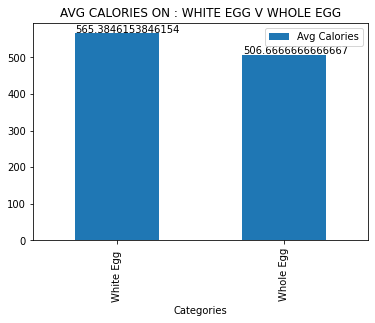

In [ ]:
# VISUALISASI PADA BAR CHART

avg_egg_cal = pd.DataFrame({'Categories':['White Egg ', 'Whole Egg'], 'Avg Calories': [avg_whites_cal, avg_whole_cal]})
ax = avg_egg_cal.plot.bar(x = 'Categories', y = 'Avg Calories')
ax.set_title("AVG CALORIES ON : WHITE EGG V WHOLE EGG")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Text(0.5, 1.0, 'Calories bins')

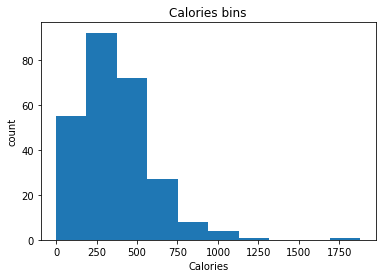

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Calories"])

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

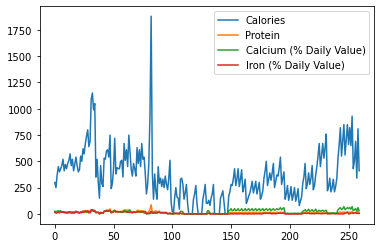

In [ ]:
df.plot(kind="line")

In [ ]:
df.head()

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value),Calories-binned
0,Breakfast,Egg McMuffin,300,17,25,15,Low
1,Breakfast,Egg White Delight,250,18,25,8,Low
2,Breakfast,Sausage McMuffin,370,14,25,10,Low
3,Breakfast,Sausage McMuffin with Egg,450,21,30,15,Low
4,Breakfast,Sausage McMuffin with Egg Whites,400,21,25,10,Low


In [ ]:
df["Calories"].value_counts()

0      16
340    10
430    10
280     9
250     8
       ..
740     1
760     1
930     1
810     1
650     1
Name: Calories, Length: 78, dtype: int64

Text(0.5, 1.0, 'Calories bins')

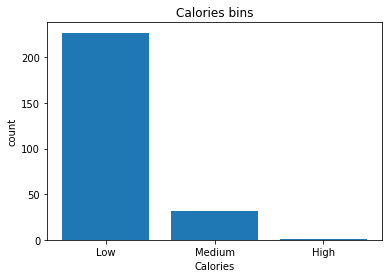

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Calories-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

Text(0.5, 1.0, 'Calories bins')

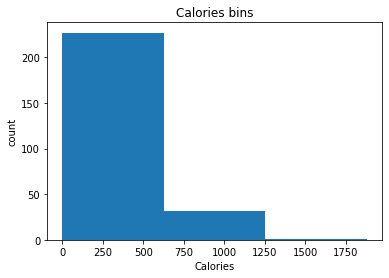

In [ ]:
#@title Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Calories"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

In [ ]:
df.head()

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value),Calories-binned
0,Breakfast,Egg McMuffin,300,17,25,15,Low
1,Breakfast,Egg White Delight,250,18,25,8,Low
2,Breakfast,Sausage McMuffin,370,14,25,10,Low
3,Breakfast,Sausage McMuffin with Egg,450,21,30,15,Low
4,Breakfast,Sausage McMuffin with Egg Whites,400,21,25,10,Low


In [ ]:
df.columns

Index(['Category', 'Item', 'Calories', 'Protein', 'Calcium (% Daily Value)',
       'Iron (% Daily Value)', 'Calories-binned'],
      dtype='object')

In [ ]:
df.isnull().sum()

Category                   0
Item                       0
Calories                   0
Protein                    0
Calcium (% Daily Value)    0
Iron (% Daily Value)       0
Calories-binned            0
dtype: int64

# Specialized Visualization Tools

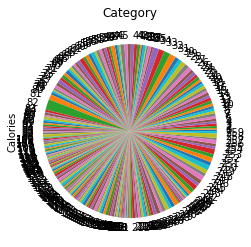

In [ ]:
#@title Pie Charts
from matplotlib import pyplot as plt 
df['Calories'].plot(kind='pie')
plt.title("Calories")
# show plot 
plt.show() 

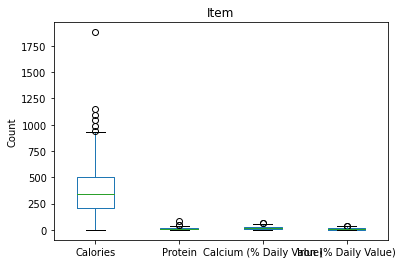

In [ ]:
#@title Box Plots
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.ylabel("Count")
plt.title("Item")
plt.show()

# Advanced Visualization Tools

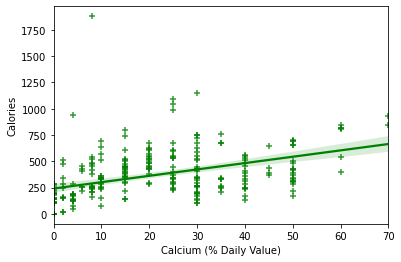

In [ ]:
#@title Regression Plots with Seaborn
import seaborn as sns
ax = sns.regplot(x='Calcium (% Daily Value)', y='Calories', data=df, marker='+', color='green')